# 数据标准化

In [1]:
import numpy as np
from ML.knn import kNN_classify
from ML.model_selection import train_test_split
from ML.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# 有两个品种的树苗
# 树苗的直径cm    生长天数

X = np.array([
    [1.0, 100],
    [1.1, 200],
    [0.9, 150],
    [0.2, 190],
    [1.0, 100],
    [1.1, 200],
    [0.7, 150],
    [0.2, 190],
    [2.1, 250],
    [1.8, 220],
    [2.2, 290],
    [1.9, 270],
    [2.1, 390],
    [1.8, 220],
    [2.2, 258],
    [1.9, 360]
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

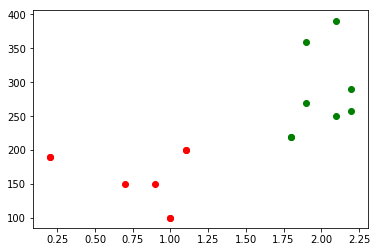

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='g')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, seed=100)
y_predict = kNN_classify(X_train, y_train, X_test)
accuracy_score(y_test, y_predict)

0.5

从上面的结果可知，knn预测出来的准确率非常低。
原因是 样本不同特征之间他们的量纲不一样，会严重地影响到机器学习的效果

### 为什么需要对数据进行标准化：
样本不同特征之间他们的量纲不一样，会严重地影响到机器学习的效果

### 如何对数据进行标准化：
将数据按照比例进行缩放，使之落入一个小的特定空间之内

### 0均值标准化：
使之落入一个均值为0，标准差为1的这样一个范围内

#### 标准化并不会让数据的分布发生变化，但是坐标值变小了，去除了量纲对我们算法的影响

In [5]:
X[:, 0]

array([1. , 1.1, 0.9, 0.2, 1. , 1.1, 0.7, 0.2, 2.1, 1.8, 2.2, 1.9, 2.1,
       1.8, 2.2, 1.9])

In [6]:
X[:, 0] = (X[:, 0] - np.mean(X[:, 0])) / np.std(X[:, 0])       # 进行0均值标准化

In [7]:
X[:, 0]

array([-0.57775121, -0.42865412, -0.72684829, -1.77052789, -0.57775121,
       -0.42865412, -1.02504246, -1.77052789,  1.06231674,  0.61502548,
        1.21141382,  0.76412256,  1.06231674,  0.61502548,  1.21141382,
        0.76412256])

In [8]:
np.mean(X[:, 0])

9.71445146547012e-17

In [9]:
np.std(X[:, 0])

0.9999999999999999

In [10]:
X[:, 1] = (X[:, 1] - np.mean(X[:, 1])) / np.std(X[:, 1])       # 进行0均值标准化

In [11]:
X[:, 1]

array([-1.53655713, -0.26798571, -0.90227142, -0.39484285, -1.53655713,
       -0.26798571, -0.90227142, -0.39484285,  0.3663    , -0.01427143,
        0.87372856,  0.62001428,  2.14229998, -0.01427143,  0.46778571,
        1.76172855])

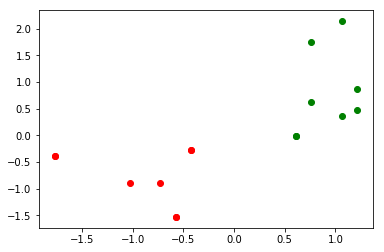

In [12]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='g')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, seed=100)
y_predict = kNN_classify(X_train, y_train, X_test)
accuracy_score(y_test, y_predict)

1.0

In [17]:
from ML.preprocessing import StandardScaler

In [18]:
X = np.array([
    [1.0, 100],
    [1.1, 200],
    [0.9, 150],
    [0.2, 190],
    [1.0, 100],
    [1.1, 200],
    [0.7, 150],
    [0.2, 190],
    [2.1, 250],
    [1.8, 220],
    [2.2, 290],
    [1.9, 270],
    [2.1, 390],
    [1.8, 220],
    [2.2, 258],
    [1.9, 360]
])

standardScaler = StandardScaler()
standardScaler.fit(X)

In [20]:
X2 = standardScaler.transform(X)

In [21]:
X2

array([[-0.57775121, -1.53655713],
       [-0.42865412, -0.26798571],
       [-0.72684829, -0.90227142],
       [-1.77052789, -0.39484285],
       [-0.57775121, -1.53655713],
       [-0.42865412, -0.26798571],
       [-1.02504246, -0.90227142],
       [-1.77052789, -0.39484285],
       [ 1.06231674,  0.3663    ],
       [ 0.61502548, -0.01427143],
       [ 1.21141382,  0.87372856],
       [ 0.76412256,  0.62001428],
       [ 1.06231674,  2.14229998],
       [ 0.61502548, -0.01427143],
       [ 1.21141382,  0.46778571],
       [ 0.76412256,  1.76172855]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, seed=100)
y_predict = kNN_classify(X_train, y_train, X_test)
accuracy_score(y_test, y_predict)

1.0

数据标准化  -->  拆分训练集和测试集  -->  KNN分类器进行预测  -->  计算预测准确率